In [540]:
import numpy as np
import matplotlib.pyplot as plt

* x1 e x2: dados de entrada.
* w1 e w2: pesos que serão multiplicados pelos dados de entrada.
* b: bias, também é um peso, porém é chamado de “peso livre” por não ser multiplicado com nenhuma outra variável.
* z: soma das multiplicações e adição do bias e posteriormente aplicado a função de ativação, que é responsável pela saída do dado processado.
* função de ativação: função matemática responsável por produzir o dado binário de saída. Normalmente na função de ativação é utilizada a função degrau, onde se a saída da função for maior ou igual a 0, o resultado produzido será 1, se for menor, resultará em 0.
* erro: valor esperado subtraído do valor predito pelo modelo.
* taxa de aprendizagem: taxa e

In [541]:
class Perceptron:

    def __init__(self, input_size):
        # Random weights
        self.w = np.random.random(input_size)
        self.b = np.random.random()
        
    def step(self, x):
        # if x > 0:
        #     return 1
        # return 0
        # return x
        return np.heaviside(x, -1)

    def forward(self, inputs):
        output = np.dot(inputs, self.w.T) + self.b
        output = self.sigmoid(output)

        return output
    
    def train(self, inputs, outputs, lr, epochs):
        outputs = outputs.flatten()
        loss_hist = []

        for e in range(epochs):
            predictions = self.forward(inputs)

            error = outputs - predictions
            loss = self.binary_cross_entropy_loss(outputs, predictions)
            loss_hist.append(loss)


            self.w += lr * np.dot(inputs.T, error)
            self.b += lr * np.sum(error)

            if (e / 100) == 1:
                print(f"Epoch {e+1}/{epochs}, Weights: {np.round(self.w, 2)}, Bias: {np.round(self.b, 2)} Loss: {loss}")


        return loss_hist

    def mse_loss(self, y_pred, y_true):
        loss = np.mean((y_pred - y_true) ** 2)
        return loss

    def sigmoid(self, x):
        sigmoid = 1 / (1 + np.exp(-x))
        return sigmoid

    def binary_cross_entropy_loss(self, y_true, y_pred):
        # Evita log(0) com um pequeno epsilon
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        
        # Fórmula da Binary Cross-Entropy Loss
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

In [542]:
percp = Perceptron(2)

## AND logic case

In [543]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.float64([[0], [0], [0], [1]])

In [544]:
hist = percp.train(inputs, outputs, 0.1, 1000)

Epoch 101/1000, Weights: [1.86 1.78], Bias: -3.02 Loss: 0.25266828585723944


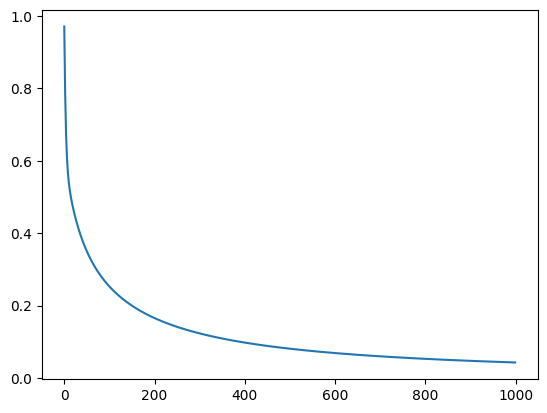

In [545]:
plt.plot(hist)

In [546]:
pred_1 = percp.forward([0, 0])
pred_2 = percp.forward([0, 1])
pred_3 = percp.forward([1, 0])
pred_4 = percp.forward([1, 1])

print("Predictions:")
print(pred_1)
print(pred_2)
print(pred_3)
print(pred_4)

Predictions:
0.0001938631199028975
0.04884000539323436
0.048841421665911655
0.9314979148304611


## OR logic case

In [547]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.float64([[0], [1], [1], [1]])

In [548]:
# Passamos os dados de entrada e de saída, junto com a taxa de aprendizagem e a quantidade de épocas de treinamento
hist = percp.train(inputs, outputs, 0.1, 1000)

Epoch 101/1000, Weights: [7.65 7.65], Bias: -4.48 Loss: 0.02359309811557685


In [549]:
pred_1 = percp.forward([0, 0])
pred_2 = percp.forward([0, 1])
pred_3 = percp.forward([1, 0])
pred_4 = percp.forward([1, 1])

print("Predictions:")
print(pred_1)
print(pred_2)
print(pred_3)
print(pred_4)

Predictions:
0.018899392702376616
0.9922344310531673
0.992234457529309
0.9999988200862195


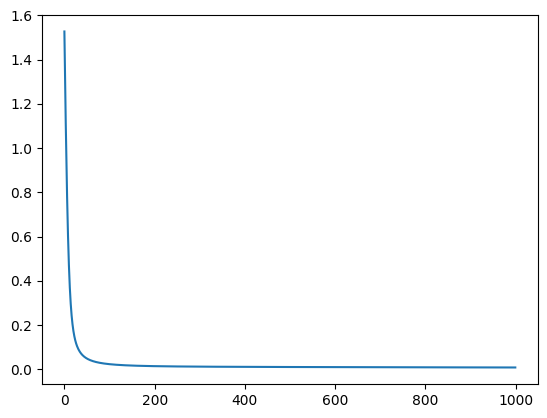

In [550]:
plt.plot(hist)

## XOR logic case

In [551]:
percp = Perceptron(2)

In [552]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.float64([[1], [0], [0], [1]])

In [553]:
hist = percp.train(inputs, outputs, 0.1, 1000)

Epoch 101/1000, Weights: [0.   0.01], Bias: -0.01 Loss: 0.69314881685163


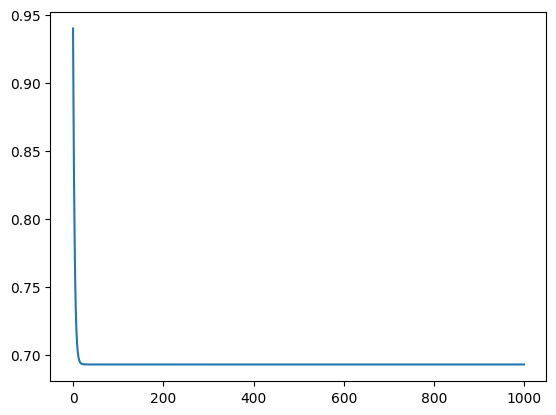

In [554]:
plt.plot(hist)

In [555]:

pred_1 = percp.forward([0, 0])
pred_2 = percp.forward([0, 1])
pred_3 = percp.forward([1, 0])
pred_4 = percp.forward([1, 1])

print("Predictions:")
print(pred_1)
print(pred_2)
print(pred_3)
print(pred_4)


Predictions:
0.49999999904713865
0.49999999985049237
0.4999999998504432
0.5000000006537969
